In [25]:
# import what we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [26]:
# load dataset
dataset = pd.read_csv('diabetes.csv')
#dataset_zero=dataset.loc[dataset.loc['Outcome']==0]


In [27]:
# copy dataset to remove rows with zero value in Glucose, BloodPressure, SkinThickness, Insulin, BMI
dataset_nozero = dataset.copy(deep=True)
dataset_nozero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_nozero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dataset_nozero = dataset_nozero.dropna()
dataset_nozero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [28]:
# set features and target
X = dataset_nozero.iloc[:, [0,1,2,3,4,5,6,7]]
Y = dataset_nozero['Outcome']
Y = np.array(Y)

In [29]:
# Undersampling the majority
rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print(sorted(Counter(Y_resampled).items()))

[(0, 130), (1, 130)]


In [30]:
corr_mat=dataset_nozero.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


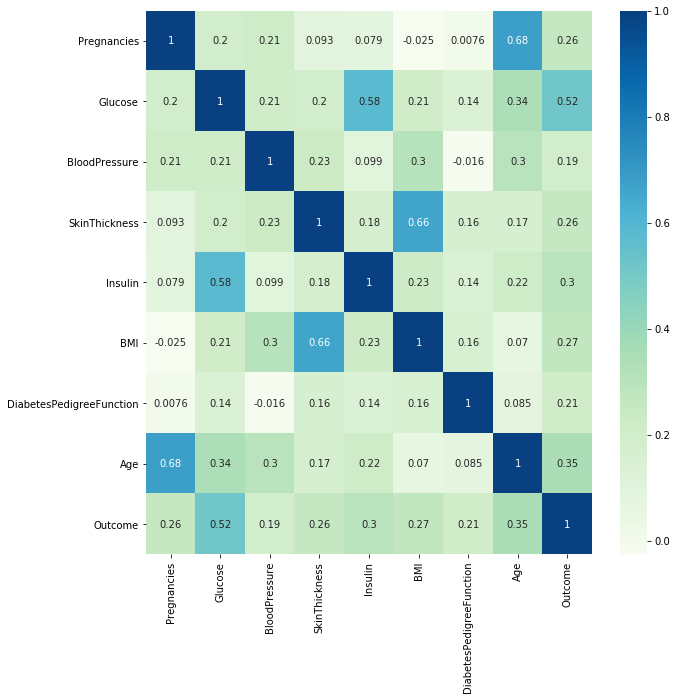

In [31]:
plt.figure(figsize=(10,10))
sb.heatmap(data=corr_mat,annot=True,cmap='GnBu')
plt.show()